# Dimentionality Reduction - Principle Component Analysis 
## The concept behind PCA

In [28]:
# Packages needed 
import numpy as np 
import matplotlib.pyplot as plt 
import ipywidgets as widgets  # interactive display
import pandas as pd

# helper Functions 
def get_data(cov_matrix):
  """
  Returns a matrix of 1000 samples from a bivariate, zero-mean Gaussian.

  Note that samples are sorted in ascending order for the first random variable

  Args:
    cov_matrix (numpy array of floats): desired covariance matrix

  Returns:
    (numpy array of floats) : samples from the bivariate Gaussian, with each
                              column corresponding to a different random
                              variable
  """

  mean = np.array([0, 0])
  X = np.random.multivariate_normal(mean, cov_matrix, size=1000)
  indices_for_sorting = np.argsort(X[:, 0])
  X = X[indices_for_sorting, :]

  return X


def plot_data(X):
  """
  Plots bivariate data. Includes a plot of each random variable, and a scatter
  plot of their joint activity. The title indicates the sample correlation
  calculated from the data.

  Args:
    X (numpy array of floats) :   Data matrix each column corresponds to a
                                  different random variable

  Returns:
    Nothing.
  """

  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(X[:, 0], color='k')
  plt.ylabel('Neuron 1')
  plt.title('Sample var 1: {:.1f}'.format(np.var(X[:, 0])))
  ax1.set_xticklabels([])
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.plot(X[:, 1], color='k')
  plt.xlabel('Sample Number')
  plt.ylabel('Neuron 2')
  plt.title('Sample var 2: {:.1f}'.format(np.var(X[:, 1])))
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(X[:, 0], X[:, 1], '.', markerfacecolor=[.5, .5, .5],
           markeredgewidth=0)
  ax3.axis('equal')
  plt.xlabel('Neuron 1 activity')
  plt.ylabel('Neuron 2 activity')
  plt.title('Sample corr: {:.1f}'.format(np.corrcoef(X[:, 0], X[:, 1])[0, 1]))
  plt.show()


def plot_basis_vectors(X, W):
  """
  Plots bivariate data as well as new basis vectors.

  Args:
    X (numpy array of floats) :   Data matrix each column corresponds to a
                                  different random variable
    W (numpy array of floats) :   Square matrix representing new orthonormal
                                  basis each column represents a basis vector

  Returns:
    Nothing.
  """

  plt.figure(figsize=[4, 4])
  plt.plot(X[:, 0], X[:, 1], '.', color=[.5, .5, .5], label='Data')
  plt.axis('equal')
  plt.xlabel('Neuron 1 activity')
  plt.ylabel('Neuron 2 activity')
  plt.plot([0, W[0, 0]], [0, W[1, 0]], color='r', linewidth=3,
           label='Basis vector 1')
  plt.plot([0, W[0, 1]], [0, W[1, 1]], color='b', linewidth=3,
           label='Basis vector 2')
  plt.legend()
  plt.show()


def plot_data_new_basis(Y):
  """
  Plots bivariate data after transformation to new bases.
  Similar to plot_data but with colors corresponding to projections onto
  basis 1 (red) and basis 2 (blue). The title indicates the sample correlation
  calculated from the data.

  Note that samples are re-sorted in ascending order for the first
  random variable.

  Args:
    Y (numpy array of floats):   Data matrix in new basis each column
                                 corresponds to a different random variable

  Returns:
    Nothing.
  """
  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(Y[:, 0], 'r')
  plt.xlabel
  plt.ylabel('Projection \n basis vector 1')
  plt.title('Sample var 1: {:.1f}'.format(np.var(Y[:, 0])))
  ax1.set_xticklabels([])
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.plot(Y[:, 1], 'b')
  plt.xlabel('Sample number')
  plt.ylabel('Projection \n basis vector 2')
  plt.title('Sample var 2: {:.1f}'.format(np.var(Y[:, 1])))
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(Y[:, 0], Y[:, 1], '.', color=[.5, .5, .5])
  ax3.axis('equal')
  plt.xlabel('Projection basis vector 1')
  plt.ylabel('Projection basis vector 2')
  plt.title('Sample corr: {:.1f}'.format(np.corrcoef(Y[:, 0], Y[:, 1])[0, 1]))
  plt.show()


def plot_eigenvalues(evals):
  """
  Plots eigenvalues.

  Args:
      (numpy array of floats) : Vector of eigenvalues

  Returns:
    Nothing.

  """
  plt.figure(figsize=(4, 4))
  plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
  plt.xlabel('Component')
  plt.ylabel('Eigenvalue')
  plt.title('Scree plot')
  plt.xticks(np.arange(1, len(evals) + 1))
  #plt.ylim([0, 2.5])


def sort_evals_descending(evals, evectors):
  """
  Sorts eigenvalues and eigenvectors in decreasing order. Also aligns first two
  eigenvectors to be in first two quadrants (if 2D).

  Args:
    evals (numpy array of floats)    : Vector of eigenvalues
    evectors (numpy array of floats) : Corresponding matrix of eigenvectors
                                        each column corresponds to a different
                                        eigenvalue

  Returns:
    (numpy array of floats)          : Vector of eigenvalues after sorting
    (numpy array of floats)          : Matrix of eigenvectors after sorting
  """

  index = np.flip(np.argsort(evals))
  evals = evals[index]
  evectors = evectors[:, index]
  if evals.shape[0] == 2:
    if np.arccos(np.matmul(evectors[:, 0],
                           1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
      evectors[:, 0] = -evectors[:, 0]
    if np.arccos(np.matmul(evectors[:, 1],
                           1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
      evectors[:, 1] = -evectors[:, 1]
  return evals, evectors

def plot_variance_explained(variance_explained):
  """
  Plots eigenvalues.

  Args:
    variance_explained (numpy array of floats) : Vector of variance explained
                                                 for each PC

  Returns:
    Nothing.

  """

  plt.figure()
  plt.plot(np.arange(1, len(variance_explained) + 1), variance_explained,
           '--k')
  plt.xlabel('Number of components')
  plt.ylabel('Variance explained')
  plt.show()



Mutivariate Data: (Many Variables): Example of a neural Recording where we have a vector where each Xi represents a firing rate of a neruon.

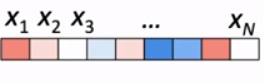


So at each time point you will collect a vector of neurons Xi-Xn. so we can then stack all these vectors together an make a matrix: 

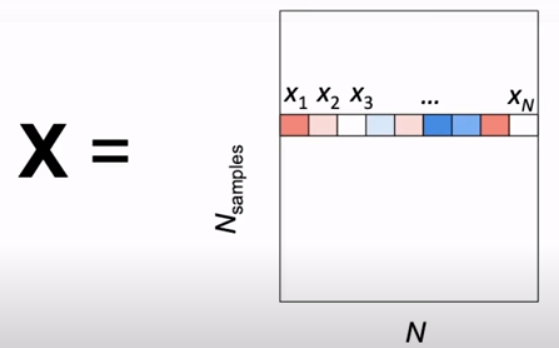

### Okay So Each Row of theis matrix would represent what?


In [2]:
# Answer 
# All the Neurons X1-Xn at a single sample(timepoint)

### And what would each column represent? 

In [3]:
# Answer
#1 neuron at all samples 

We can Represent this Data in a different way though..a more geometric way. For instance we can represent this data as a point in a high dimensional vector space: So each Coordinate Axis = the firing rate for a different neuron, and each point would then be a sample. 

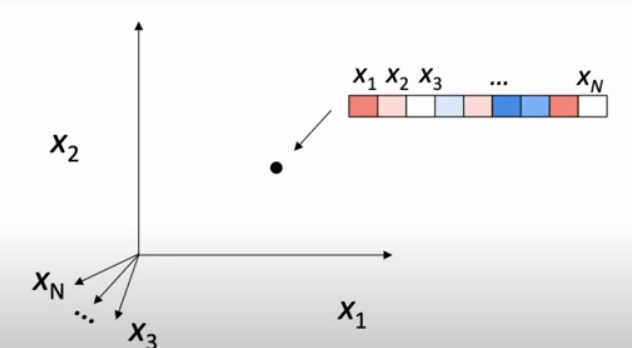

For the sake of visualization.. lets just say we have 2 neurons... so how many axis would we have? 


In [4]:
#Answer
# Two

So now we have 2 dimensions where each dimension is a neuron, and each point on this 2 dimensional graph will be a sample(observation) 
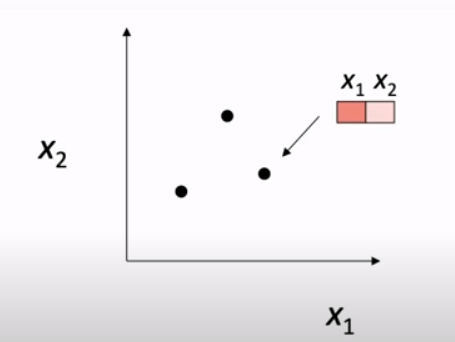

So what are the posible flavors of variability we could have on this graph? 

One possibility would be Uncorrelated data- Neuron 1 has the same vairability as Neuron 2 

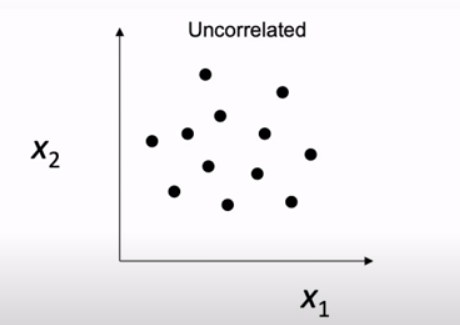

Another possibility would be that Neuron 1 could have alot of variability and NOT 2: You could say then the direction of the most variance of the data is along the axis corresponding to Neuron 1 

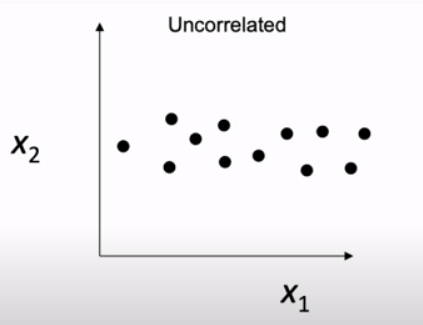

A Third Possibility is that your data is correlated. So the Direction of most of the vairence of the data is Not on the Coordinate axis of Neuron 1 or on Neuron two.. its on some new axis. 

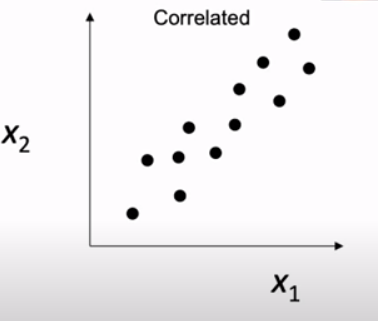


The GOAL OF PCA IS TO FIND THIS DIRECTION!! 

WHY??? 
Well Neural Data is usually not totally random and uncorrelated so the Idea is that if we have a bunch of neurons which can be representented as this high dimensional vector space, they actually will covary together and so we can reduce the dimentionality of the date to better understand how the neurons are "working together" 




## A Geometric View of the data 

Definitions 

We can measure the varibility of each neuron individually=Variance, which describes the spread of the distribution of firing rates around the neurons average value and is mathmatically described as  

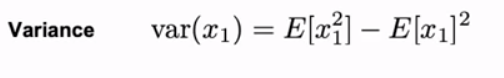

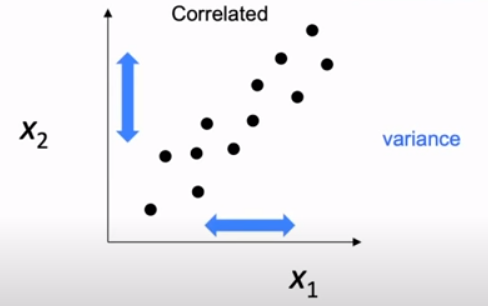



In contrast we can have Covarience as well : which measures the tendency of those two neurons to increase or decrease there firing rates TOGETHER compared to their average values. This is mathmatically described as: 

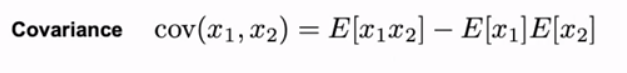

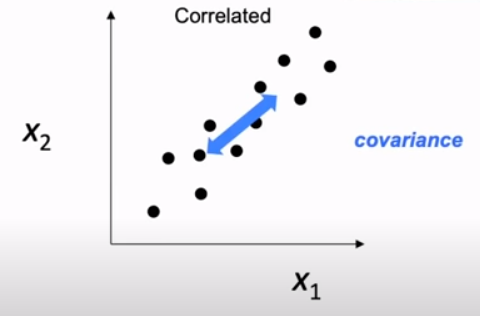



So lets look at the Equations a little bit: The Covariance is of X1 and X2 is equal to the Expectation of the product of X1 AND X2 minus the product of each expectation

### So What happens if you take this covariance equation and just plug in X1 for both X1 and X2 


In [5]:
#Answer 
# You get the Variance Equation! 

### One last thing wee need to do to the covariance equation: Units. So what happens if we plug in Hertz(Hz) to our equation?



In [6]:
# Anwser 
# We Get out Hz squared
#Covariance= E[Hz*Hz]-E[Hz]*E[Hz] ==> E[Hz^2] -Hz^2 = Hz^2... Thats a weird unit.... 

So if we divide our covariance by the product of the standard deviations this  gives us the correlation!  (takes care of our unit problem and normalizes between -1 and 1 

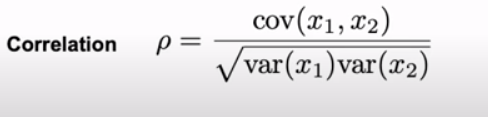


## The Covariarence Matrix
So we can sum all the information we just talked about in a covariance matrix which is denoted as follows: This is an NxN matrix whose i/jth element is the covariance between Xi and Xj... this is a symatic matrix so that means what? it means the j/ith element of this matrix is the same as the i/jth element.  


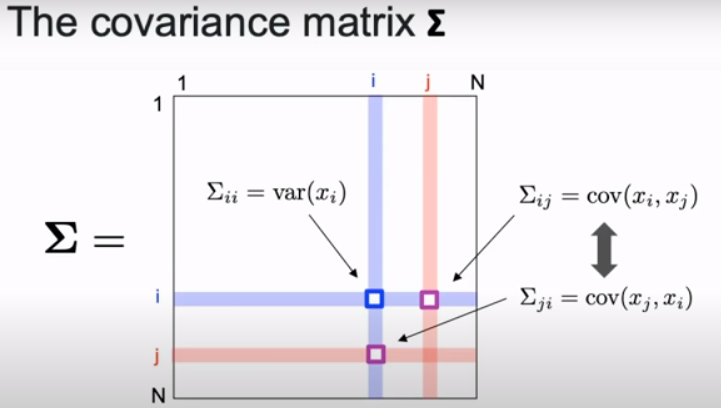

### So that means this matrix is symmentric across what?  



In [7]:
# Answer 
# The Diagonal 

### And What would the diagonal be equal to? 

In [8]:
#Answer
#The Variance 


So To summarize: 
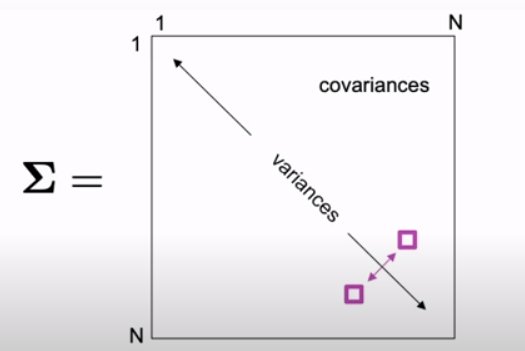

Varriances are on the Diagonal 
Covariances on the off Diagonal 
Matrix is symmetrical: (Sigma transpose = Sigma) 


## Mutivariate Normal Distribution 
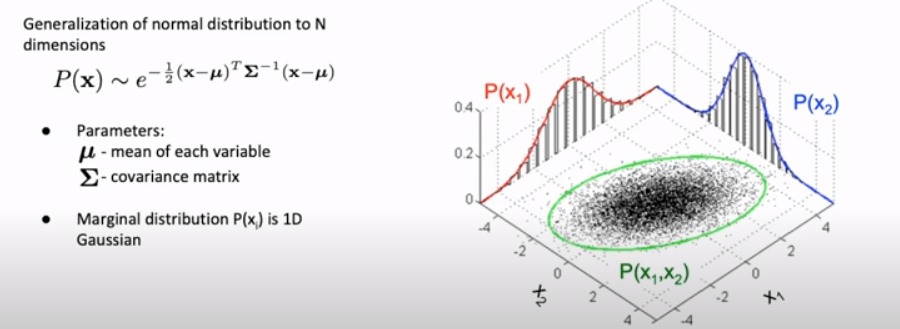


Okay so let generate some fake data: 
We are going to draw random samples from a bivariate normal distribution. 

Additionally  the joint distribution with have some correlation coefficient. 

Okay so for simplicity we are going to subtract the means of each variable and set it equal to zero. So the covariance matrix will have the following form: 


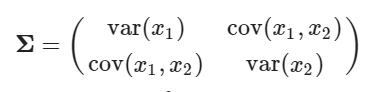

###  Draw samples from a distribution 

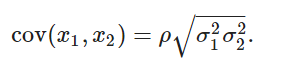



In [9]:
# We are going to define a function here that will calculate our covariancce. It will take the inputs: vriance of our first variable 
# Varience of our second variable and a coorrelation coeeficent. 



def calculate_cov_matrix(var_1, var_2, corr_coef):

  #cov = 

  cov_matrix = np.array([[var_1, cov], [cov, var_2]])

  return cov_matrix




In [10]:
#Answer 
def calculate_cov_matrix(var_1, var_2, corr_coef):

  cov = corr_coef*np.sqrt(var_1*var_2)

  cov_matrix = np.array([[var_1, cov], [cov, var_2]])

  return cov_matrix


Now Lets use this function to calculate the desired covariance matrix given ro=0.8, varience1=1 and variance2=1 
ans set your anwser= cov_matrix




In [11]:
#Answer 

variance_1 = 1
variance_2 = 1
corr_coef = 0.8

cov_matrix=calculate_cov_matrix(variance_1, variance_2, corr_coef)


Now Let's take our newly generated covariance matrix and and generate samples  so we can loook at the data. 
I have included a function called get_data takes the input cov_matrix we just calculated and generates samples for you. 


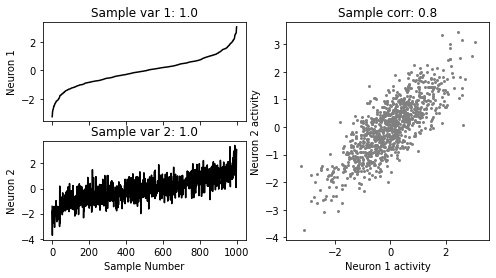

In [12]:
np.random.seed(402)

X=get_data(cov_matrix)

# and now lets plot this: I have also include a function that will allow you to plot this beutifully. use plot_data to plot data 
plot_data(X)


### Now lets look at these data again with Different variences and differenct correlation cooeficients

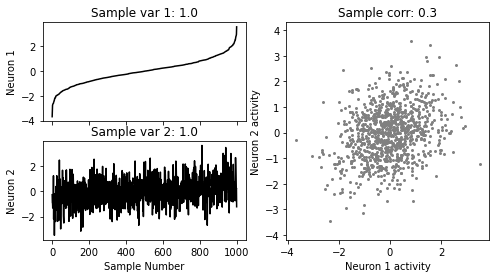

In [13]:


#Answer 
np.random.seed(402)

variance_1 = 1
variance_2 = 1
corr_coef = 0.3

cov_matrix=calculate_cov_matrix(variance_1, variance_2, corr_coef)
X=get_data(cov_matrix)
plot_data(X)



## Define a new Orthonormal Basis 
Remember our goal is to take this high dimensional  data and reduce it to a lower dimensional space. 

So, In order to know how this works we have to represent our data in a certain way. 

Definition: BASIS: So a basis is a set of N vectors with which you can construct any point in an N-dimentional vector space. 

We usually use the standard basis which means that our first basis is in the direction of varible 1 (neuron 1) and our second basis is in the direction of variable 2 (neuron 2). 

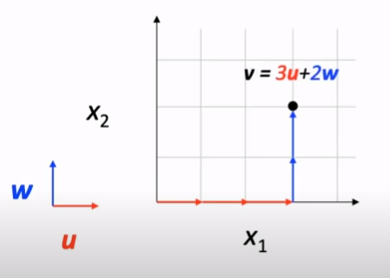


However, we could use a different Basis... lets rotate the basis... now what do we have the point v as: 

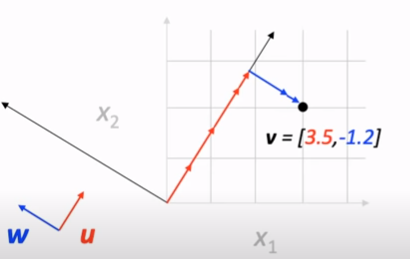


So above we have 2 orthonormal basis. 

Two vectors are orthonormal if 
1. They are Orthongonal (dot product=0)
2. The have unit length=1


So How do we figure out if a basis is orthogonal... we can take the dot product. with we can represent in two ways. Since we are doing linear algebra here we will use the matrix way.  


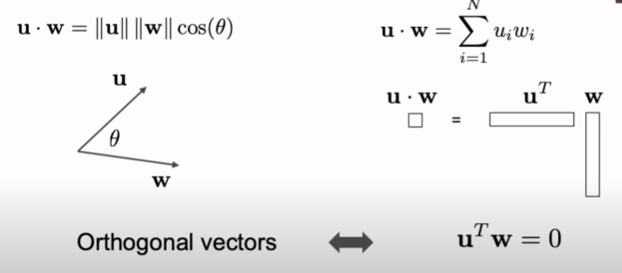


### Find an orthonormal basis given an arbitrary 2D vecotr as an input. 



In [14]:
#def define_orthonormal_basis(u):

  # normalize vector u
  #u = hint u=u/magnitude of u(think back to trig)
  # calculate vector w that is orthogonal to w
  #w = np.array([-u[1], u[0]])

 # W = np.column_stack([u, w])

  #return W

In [15]:
#Answer
def define_orthonormal_basis(u):

  # normalize vector u
  u = u / np.sqrt(u[0] ** 2 + u[1] ** 2)
  # calculate vector w that is orthogonal to w
  w = np.array([-u[1], u[0]])

  W = np.column_stack([u, w])

  return W

Okay Now lets plot use this function to find out the orthonormal basis. Lets use u=[3,1]. Ues the function plot_basis_vectors. which will take data and take our output of our orthonormal function =W 




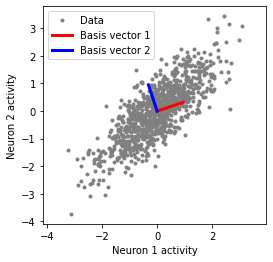

In [16]:

np.random.seed(402)  # set random seed
variance_1 = 1
variance_2 = 1
corr_coef = 0.8

cov_matrix = calculate_cov_matrix(variance_1, variance_2, corr_coef)
X = get_data(cov_matrix)
u = np.array([3, 1])

W = define_orthonormal_basis(u)
plot_basis_vectors(X, W)

## Change our basis via Projection 

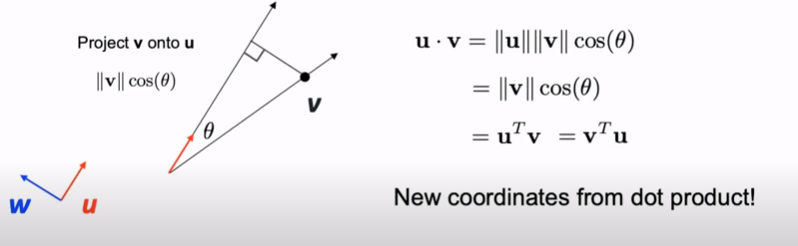

So we can literally project onto a new basis by Doing Matrix multiplication.  So lets take our orthonormal matrix W and multiply by some random matrix data. Tou can use the function change of basis for this, it takes inputs data and W 







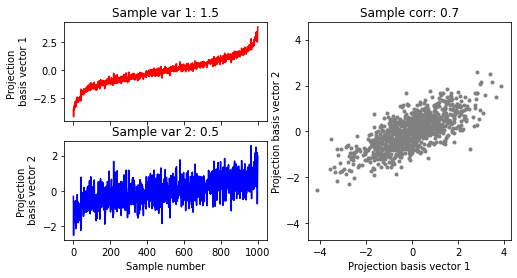

In [17]:
def change_of_basis(X, W):
 
  # project data onto new basis described by W
  Y = np.matmul(X,W)

  return Y

#and then we will plot the data using a custom plot function 

Y = change_of_basis(X, W)
plot_data_new_basis(Y)

In [18]:
def refresh(theta=0):
  u = [1, np.tan(theta * np.pi / 180)]
  W = define_orthonormal_basis(u)
  Y = change_of_basis(X, W)
  plot_basis_vectors(X, W)
  plot_data_new_basis(Y)


_ = widgets.interact(refresh, theta=(0, 90, 5))

interactive(children=(IntSlider(value=0, description='theta', max=90, step=5), Output()), _dom_classes=('widge…

## PCA! 
Remember we are taking N variables trying to reduce this to K features. 
How do we find these features? 

Well Here is our expectation
We expect that Directions of large variation represent Signal and directions of small varation represent noise. 
So let's find these directions of maximum variance and use them to form the new orthonormal basis of the data. 

Goal of PCA

1. define W1= vector that has the highest projected varience. (first Principle component) 
2. define W2= vector that has the highest variance while being orthogonal to W1 (second Principle component) 
3. rinse and repeat. 

We could do this interatively, but it just so happens that these vectors are eual to the eigenvectors of the covariance matrix. 

Eigenvectors 

Basically when we tranform (matrix) vectors  we can change the direction and magnitude of the vector.  If we find a matrix (transform) that changes the vectors magnitude only and not its direction these are our eigenvectors. the stretching or shrinking amount is equal to lambda (eigenvalue) 

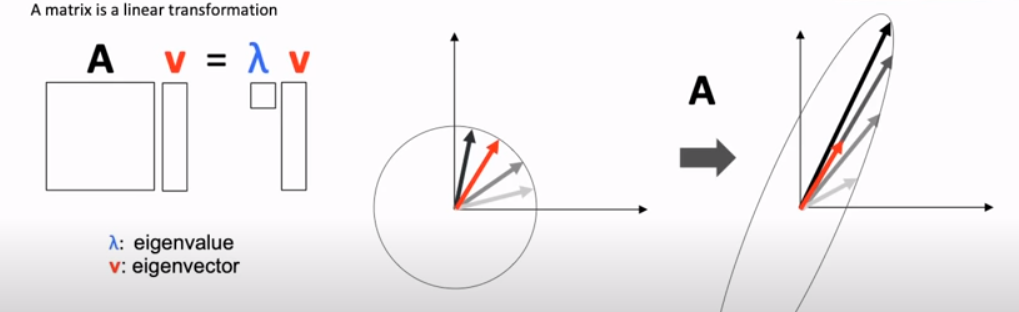

So The seteps of PCA: 

1. Substract the mean (for each neuron, subtract its average firing rate across all of the samples) 
2. Calculate the Eigenvectors (Wi) of the covariance matrix Sigma, and order this by the corresponding eigenvalue lambdai
3. Project the Data  onto the new basis W1,W2....Wn (this is just matrix multiplation as we found out above) 

Key Properties to remember of PCA: 
    Wi are orthogonal 
    Si or the latent vairaible (scores) are uncorrelated 
    Projected varience= lambdai
### Get our sample covariance matrix from the bivariate normal distribution 
Now we have our function still that creates a covariance matrix for us and then we can get the data using that covariance matrix. However, in our real data we will not have the true covariance so we will have to get the estimate of the covariance matrix instead. this can be found using the formula 

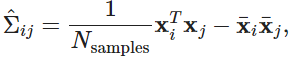

Xi=a column vector  representing all measurement of neuron i and Xbari = the mean of neuron i across samples. 

To write this in an essier way we can assume mean subtration so the sample covariance matrix becomes rewritten as 
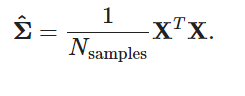



In [19]:
#def get_sample_cov_matrix(X):
  # First Subtract the mean of X
  #X = 
  # Calculate the covariance matrix (hint: use np.matmul)
  #cov_matrix = ...

  #return cov_matrix



In [20]:
#Answser
def get_sample_cov_matrix(X):
  """
  Returns the sample covariance matrix of data X
  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable
  Returns:
    (numpy array of floats)   : Covariance matrix
  """   

  # First Subtract the mean of X
  X = X - np.mean(X, 0)
  # Calculate the covariance matrix (hint: use np.matmul)
  cov_matrix = cov_matrix = 1 / X.shape[0] * np.matmul(X.T, X)

  return cov_matrix

In [21]:
# We can look at how our sample covariance matrix matches the true covariance matrix. 

variance_1 = 1
variance_2 = 1
corr_coef = 0.8

np.random.seed(402)  # set random seed

cov_matrix = calculate_cov_matrix(variance_1, variance_2, corr_coef)
print(cov_matrix)

X = get_data(cov_matrix)
sample_cov_matrix = get_sample_cov_matrix(X)
print(sample_cov_matrix)

[[1.  0.8]
 [0.8 1. ]]
[[1.0127769  0.80925679]
 [0.80925679 1.02575374]]


### Get our eigenvectors from the covariance matrix 


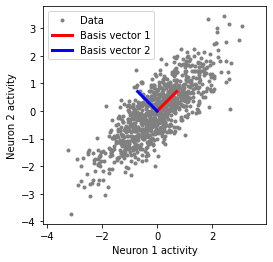

In [22]:
# Calculate the eigenvalues and eigenvectors
evals, evectors = np.linalg.eigh(cov_matrix)
# Sort the eigenvalues in descending order
evals, evectors = sort_evals_descending(evals, evectors)

plot_basis_vectors(X,evectors)

### Perform PCA by projecting our data onto our eigenvectors
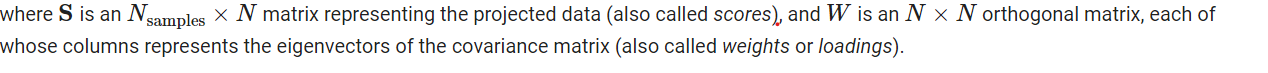


In [23]:
# Here is our mega function for PCA

def pca(X):
  """
  Sorts eigenvalues and eigenvectors in decreasing order.

  Args:
    X (numpy array of floats): Data matrix each column corresponds to a
                               different random variable

  Returns:
    (numpy array of floats)  : Data projected onto the new basis
    (numpy array of floats)  : Vector of eigenvalues
    (numpy array of floats)  : Corresponding matrix of eigenvectors

  """
  # Subtract the mean of X
  X = X - np.mean(X, 0)
  # Calculate the sample covariance matrix
  cov_matrix = get_sample_cov_matrix(X)
  # Calculate the eigenvalues and eigenvectors
  evals, evectors = np.linalg.eigh(cov_matrix)
  # Sort the eigenvalues in descending order
  evals, evectors = sort_evals_descending(evals, evectors)
  # Project the data onto the new eigenvector basis
  score = change_of_basis(X, evectors)

  return score, evectors, evals


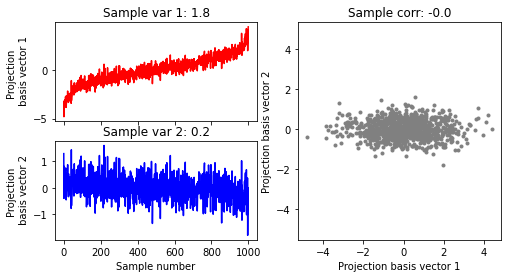

In [24]:
# Call the PCA function on X and set output equal to score,evectors,evals. 
#Answer 
score, evectors, evals = pca(X)

plot_data_new_basis(score)

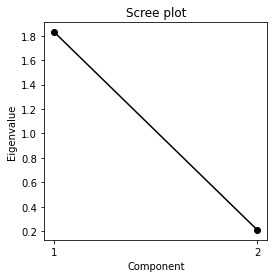

In [25]:
plot_eigenvalues(evals)

In [26]:
def refresh(corr_coef=.8):
  cov_matrix = calculate_cov_matrix(variance_1, variance_2, corr_coef)
  X = get_data(cov_matrix)
  score, evectors, evals = pca(X)
  plot_eigenvalues(evals)
  plot_basis_vectors(X, evectors)


_ = widgets.interact(refresh, corr_coef=(-1, 1, .1))

interactive(children=(FloatSlider(value=0.8, description='corr_coef', max=1.0, min=-1.0), Output()), _dom_clas…

## Now with real data 
### Load our data



In [40]:
ITImatrix=np.loadtxt('FiringRateArrayITI.csv',delimiter=',')
ITImatrix
ITImatrix.shape
# okay but I happen to know that this matrix is Neurons as rows and colums as trials (observations)
#we need it the other way so lets transpose 
ITImat=ITImatrix
ITImat.shape
# now we get the other chirp trials: 
ChirpMat=np.loadtxt('FiringRateArrayChirp.csv',delimiter=',')
ChirpMat.shape


#Now combine matrices 

(22, 41)

In [41]:
PCA_matrix=np.column_stack((ITImat,ChirpMat))
PCA_matrix.shape

(22, 82)

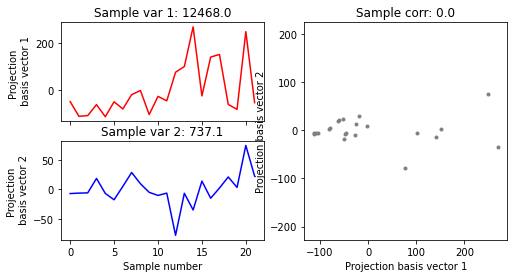

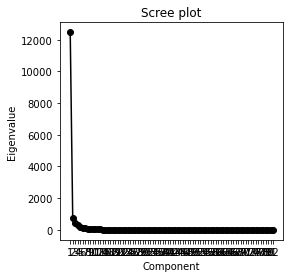

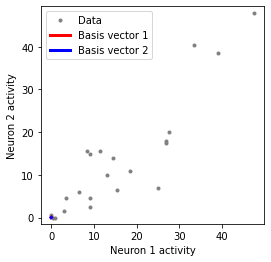

In [42]:
score, evectors, evals = pca(PCA_matrix)

plot_data_new_basis(score)
plot_eigenvalues(evals)

plot_basis_vectors(PCA_matrix, evectors)


In [43]:

variance_explained=[] 
for i in evals:
    variance_explained.append((i/sum(evals))*100)
    
    
print(variance_explained)

[84.2981445475436, 4.983962293556071, 2.922039860795925, 2.075134146926723, 1.41144337578298, 0.895699107443036, 0.8254758339402838, 0.5087305778127804, 0.4099692722502404, 0.36530359900946174, 0.2976321153895312, 0.24308454030008575, 0.20419390587486283, 0.1583650458509393, 0.1353612809192703, 0.12302656663075438, 0.08402030116380446, 0.03584837864178235, 0.010460783988077932, 0.008950864763871004, 0.0031536014159118516, 4.672793407467005e-15, 4.1846306123433376e-15, 1.9425195053043105e-15, 1.7973710410431195e-15, 1.6380809540135677e-15, 1.475401089467868e-15, 1.3895900690703187e-15, 1.3046493039246713e-15, 1.2595900230555981e-15, 1.2071198310240689e-15, 1.0040429354794958e-15, 9.708240327456688e-16, 8.595873071705854e-16, 8.406939009030365e-16, 7.680024004572176e-16, 7.428799465101585e-16, 6.962485627059749e-16, 6.105342614985908e-16, 5.609069209192566e-16, 5.607045314387734e-16, 4.681642470922587e-16, 3.6146089918316786e-16, 3.5345935163197586e-16, 3.148758549922586e-16, 2.803773833

So How do we determine out intrisic dimentionality?  look for the elbow or the total variance explained. 


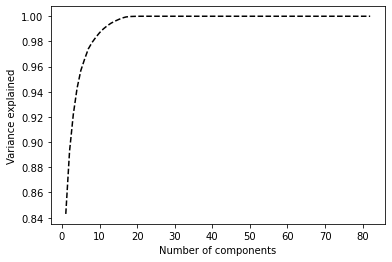

In [44]:
def get_variance_explained(evals):

  # cumulatively sum the eigenvalues
  csum = np.cumsum(evals)
  # normalize by the sum of eigenvalues
  variance_explained = csum/np.sum(evals)

  return variance_explained


# calculate the variance explained
variance_explained = get_variance_explained(evals)

plot_variance_explained(variance_explained)